In [1]:
#Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import binom, poisson, norm
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import plotly.express as px
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from pmdarima.arima import auto_arima
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.stattools import adfuller
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [2]:
#Loading the dataset
df = pd.read_csv("C:/Users/ullas/Documents/Kalyani/da_ca1/Population estimates from 1926.csv")

In [3]:
df.head()

,STATISTIC Label,Year,Single Year of Age,Sex,UNIT,VALUE
0,Population estimates from 1926,1926,All ages,Both sexes,Number,2971992
1,Population estimates from 1926,1926,All ages,Male,Number,1506889
2,Population estimates from 1926,1926,All ages,Female,Number,1465103
3,Population estimates from 1926,1926,Under 1 year,Both sexes,Number,55391
4,Population estimates from 1926,1926,Under 1 year,Male,Number,28084


In [4]:
pd.set_option('display.max_rows', None)
print(df)

                      STATISTIC Label  Year Single Year of Age         Sex  \
0      Population estimates from 1926  1926           All ages  Both sexes   
1      Population estimates from 1926  1926           All ages        Male   
2      Population estimates from 1926  1926           All ages      Female   
3      Population estimates from 1926  1926       Under 1 year  Both sexes   
4      Population estimates from 1926  1926       Under 1 year        Male   
5      Population estimates from 1926  1926       Under 1 year      Female   
6      Population estimates from 1926  1926             1 year  Both sexes   
7      Population estimates from 1926  1926             1 year        Male   
8      Population estimates from 1926  1926             1 year      Female   
9      Population estimates from 1926  1926            2 years  Both sexes   
10     Population estimates from 1926  1926            2 years        Male   
11     Population estimates from 1926  1926            2 years  

In [5]:
#Checking for missing values
print("Missing values:\n", df.isnull().sum())

Missing values:
 STATISTIC Label       0
Year                  0
Single Year of Age    0
Sex                   0
UNIT                  0
VALUE                 0
dtype: int64


In [6]:
#Descriptive Statistics
df.describe()

,Year,VALUE
count,11817.000000,1.181700e+04
mean,1996.410256,5.352461e+04
std,24.463165,2.867754e+05
min,1926.000000,6.000000e+00
25%,1986.000000,1.242700e+04
50%,2004.000000,2.667500e+04
75%,2014.000000,3.557700e+04
max,2023.000000,5.281612e+06


In [7]:
statistics = df['VALUE'].describe()
print("Descriptive Statistics for 'VALUE':")
print(statistics)

Descriptive Statistics for 'VALUE':
count    1.181700e+04
mean     5.352461e+04
std      2.867754e+05
min      6.000000e+00
25%      1.242700e+04
50%      2.667500e+04
75%      3.557700e+04
max      5.281612e+06
Name: VALUE, dtype: float64


In [8]:
#Rename the Sex column to 'Gender'
df = df.rename(columns={'Sex': 'Gender'})

#Replace 'Both sexes' with 'Both Genders' in the 'Gender' column
df['Gender'] = df['Gender'].replace('Both sexes', 'Both Genders')

df.drop(['UNIT'], axis = 1, inplace = True)

In [9]:
df.head()

,STATISTIC Label,Year,Single Year of Age,Gender,VALUE
0,Population estimates from 1926,1926,All ages,Both Genders,2971992
1,Population estimates from 1926,1926,All ages,Male,1506889
2,Population estimates from 1926,1926,All ages,Female,1465103
3,Population estimates from 1926,1926,Under 1 year,Both Genders,55391
4,Population estimates from 1926,1926,Under 1 year,Male,28084


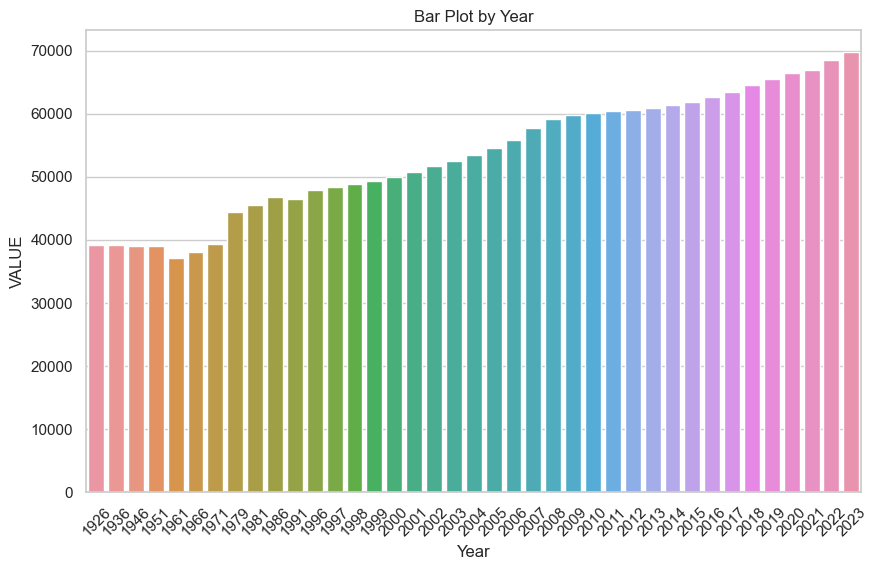

In [10]:
#Creating a bar plot for the VALUE column by Year
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='Year', y='VALUE', data=df, ci=None)
bar_plot.set(xlabel='Year', ylabel='VALUE', title='Bar Plot by Year')
plt.xticks(rotation=45)
plt.show()

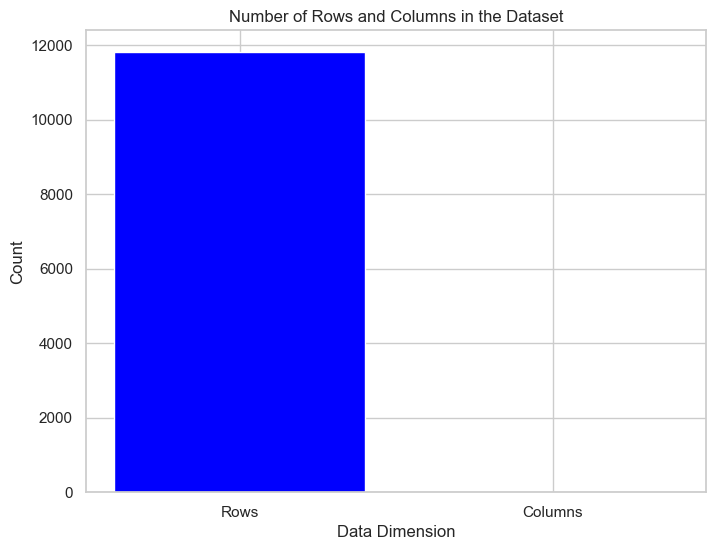

In [11]:
num_rows = len(df)
num_columns = len(df.columns)

# Create a bar plot to visualize the counts
plt.figure(figsize=(8, 6))
plt.bar(["Rows", "Columns"], [num_rows, num_columns], color=['blue', 'green'])
plt.xlabel('Data Dimension')
plt.ylabel('Count')
plt.title('Number of Rows and Columns in the Dataset')
plt.show()


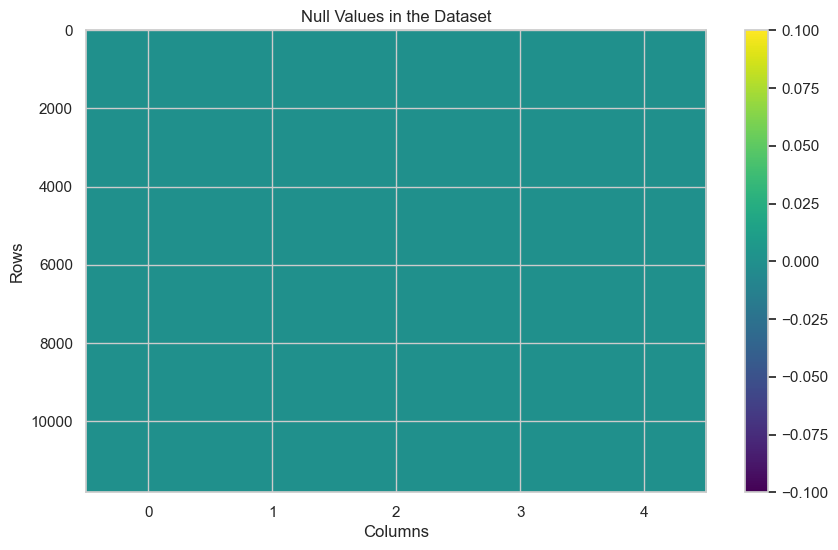

In [12]:
# Checking for null values in the DataFrame
null_values = df.isnull()

#Heatmap 
plt.figure(figsize=(10, 6))
plt.imshow(null_values, cmap='viridis', aspect='auto')
plt.colorbar()
plt.title('Null Values in the Dataset')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

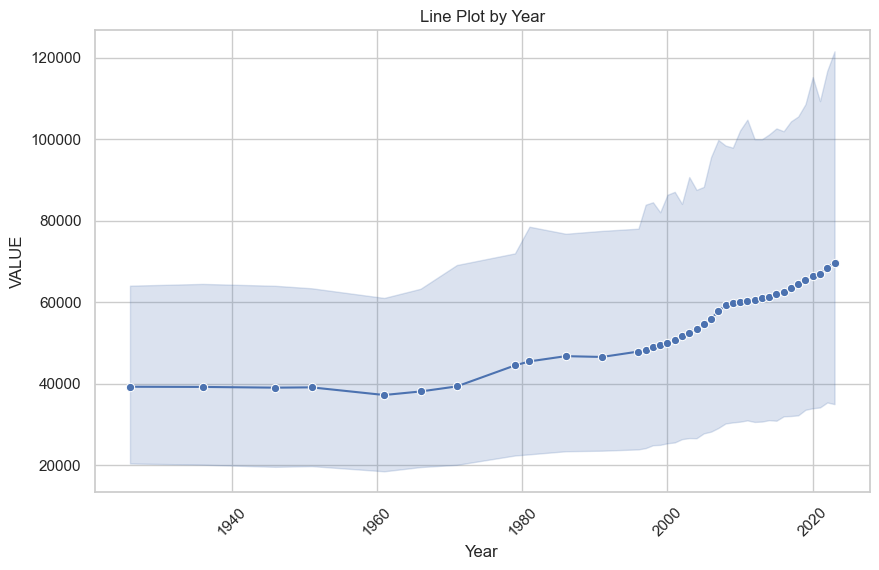

In [13]:
#Creating a line plot to show trends over the years
plt.figure(figsize=(10, 6))
line_plot = sns.lineplot(x='Year', y='VALUE', data=df, marker='o')
line_plot.set(xlabel='Year', ylabel='VALUE', title='Line Plot by Year')
plt.xticks(rotation=45)
plt.show()

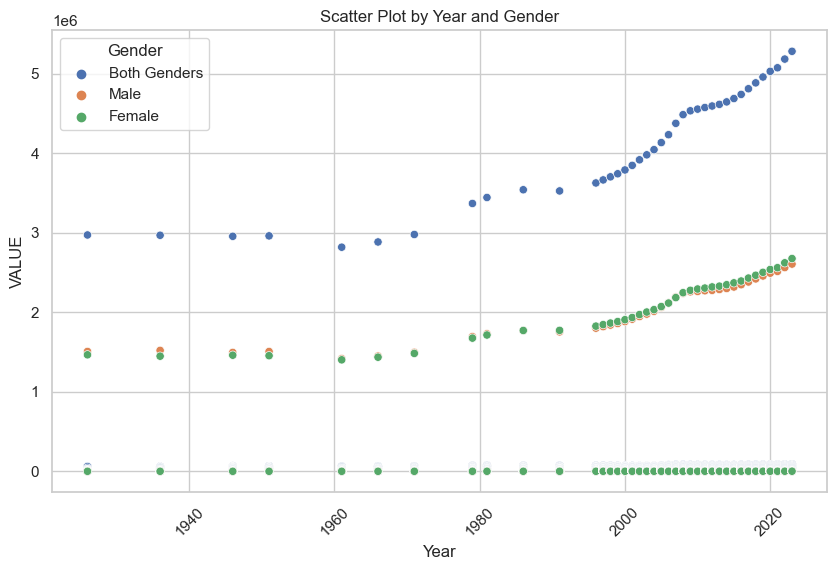

In [14]:
#Creating a scatter plot to explore relationships between Year and VALUE
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(x='Year', y='VALUE', data=df, hue='Gender')
scatter_plot.set(xlabel='Year', ylabel='VALUE', title='Scatter Plot by Year and Gender')
plt.xticks(rotation=45)
plt.show()

# Using two discrete distributions Binomial and Poisson 

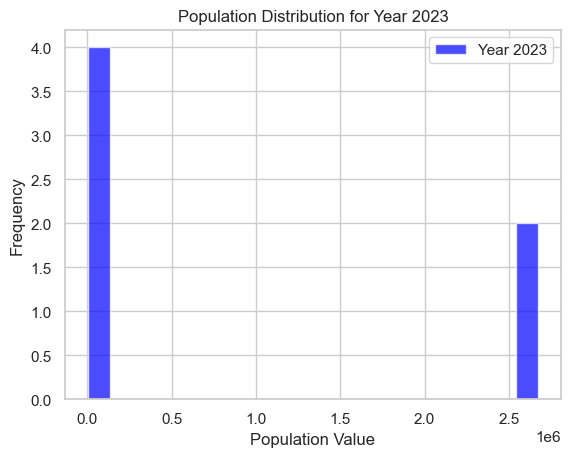

In [15]:
#Filtering the data by Single Year of Age and Gender
age_groups = ["All ages", "Under 1 year", "1 years to 98 years", "99 years and over"]
genders = ["Both sexes", "Male", "Female"]
filtered_df = df[(df["Single Year of Age"].isin(age_groups)) & (df["Gender"].isin(genders))]

#Extract the VALUE column as a NumPy array
values = filtered_df["VALUE"].values

#Creating a histogram for a specific year
year_to_visualize = 2023 
year_data = values[filtered_df["Year"] == year_to_visualize]

plt.hist(year_data, bins=20, color="blue", alpha=0.7, label=f"Year {year_to_visualize}")
plt.xlabel("Population Value")
plt.ylabel("Frequency")
plt.title(f"Population Distribution for Year {year_to_visualize}")
plt.legend()
plt.show()


# Binomial distribution

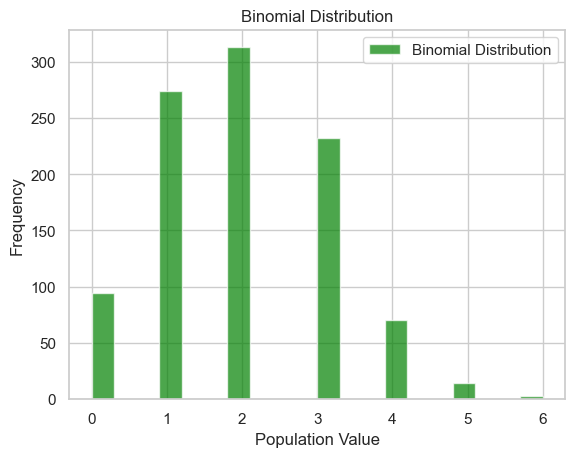

In [16]:
#Defining the parameters for the binomial distribution
n = len(year_data) 
p = year_data.mean() / year_data.max()  # Probability of success

#Generating a binomial distribution
binom_data = binom.rvs(n, p, size=1000)

#Visualizing the binomial distribution
plt.hist(binom_data, bins=20, color="green", alpha=0.7, label="Binomial Distribution")
plt.xlabel("Population Value")
plt.ylabel("Frequency")
plt.title("Binomial Distribution")
plt.legend()
plt.show()


# Poisson distribution

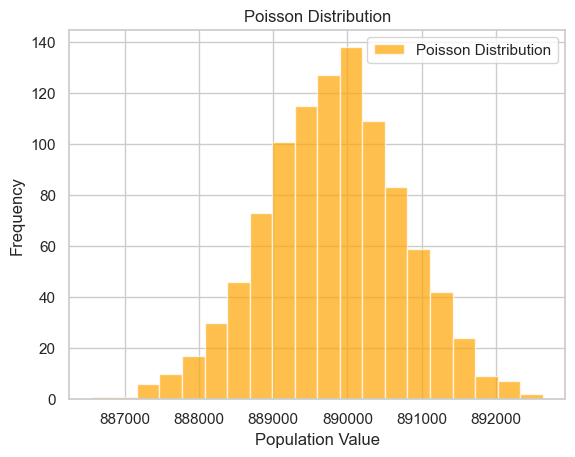

In [17]:
#Calculating the average population value for the Poisson distribution
average_value = year_data.mean()

#Generating a Poisson distribution
poisson_data = poisson.rvs(average_value, size=1000)

#Visualizing the Poisson distribution
plt.hist(poisson_data, bins=20, color="orange", alpha=0.7, label="Poisson Distribution")
plt.xlabel("Population Value")
plt.ylabel("Frequency")
plt.title("Poisson Distribution")
plt.legend()
plt.show()


# Using Normal distribution to explain and identify some information about the dataset

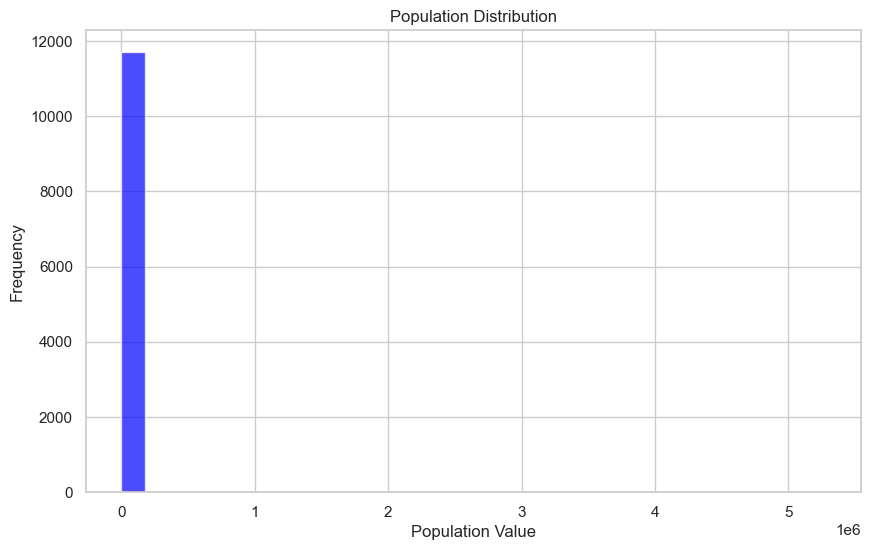

In [18]:
values = df["VALUE"].values
plt.figure(figsize=(10, 6))
plt.hist(values, bins=30, color="blue", alpha=0.7)
plt.xlabel("Population Value")
plt.ylabel("Frequency")
plt.title("Population Distribution")
plt.show()

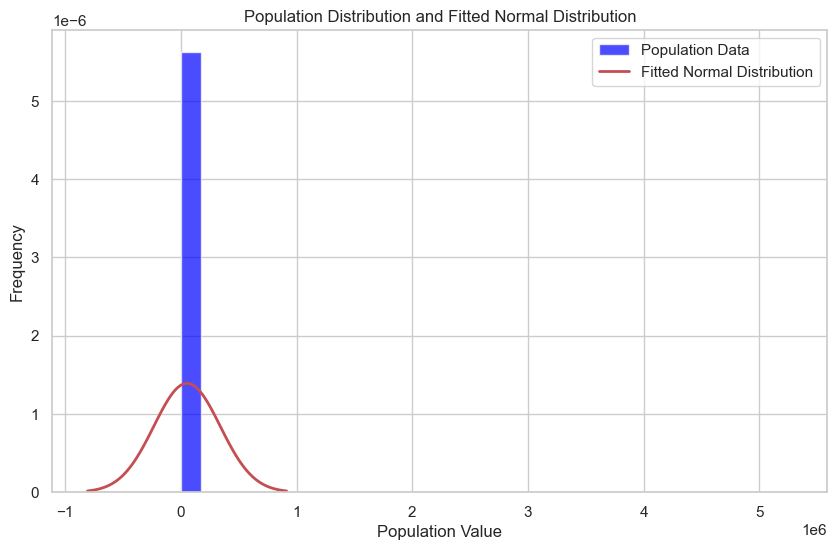

In [19]:
#Calculate the mean and standard deviation of the data
mean = np.mean(values)
std = np.std(values)

#Generating a range of values for the normal distribution
x = np.linspace(mean - 3 * std, mean + 3 * std, 100)
pdf = norm.pdf(x, mean, std)

#Visualizing the data and the fitted normal distribution
plt.figure(figsize=(10, 6))
plt.hist(values, bins=30, color="blue", alpha=0.7, density=True, label="Population Data")
plt.plot(x, pdf, 'r-', lw=2, label="Fitted Normal Distribution")
plt.xlabel("Population Value")
plt.ylabel("Frequency")
plt.title("Population Distribution and Fitted Normal Distribution")
plt.legend()
plt.show()


# Data preparation and Visualization 

In [20]:
print(df.head())

                  STATISTIC Label  Year Single Year of Age        Gender  \
0  Population estimates from 1926  1926           All ages  Both Genders   
1  Population estimates from 1926  1926           All ages          Male   
2  Population estimates from 1926  1926           All ages        Female   
3  Population estimates from 1926  1926       Under 1 year  Both Genders   
4  Population estimates from 1926  1926       Under 1 year          Male   

     VALUE  
0  2971992  
1  1506889  
2  1465103  
3    55391  
4    28084  


In [21]:
print(df.isnull().sum())

STATISTIC Label       0
Year                  0
Single Year of Age    0
Gender                0
VALUE                 0
dtype: int64


In [22]:
print(df['VALUE'].describe())

count    1.181700e+04
mean     5.352461e+04
std      2.867754e+05
min      6.000000e+00
25%      1.242700e+04
50%      2.667500e+04
75%      3.557700e+04
max      5.281612e+06
Name: VALUE, dtype: float64


# Exploratory Data Analysis (EDA)

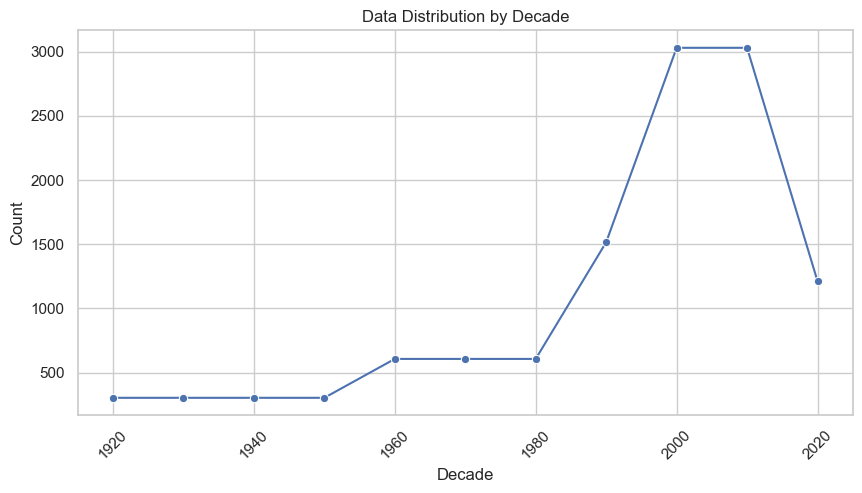

In [23]:
#Data distribution by year aggregated by decade
df['Decade'] = df['Year'] // 10 * 10
year_counts = df['Decade'].value_counts().sort_index()
plt.figure(figsize=(10, 5))
sns.lineplot(x=year_counts.index, y=year_counts.values, marker="o")
plt.title("Data Distribution by Decade")
plt.xlabel("Decade")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


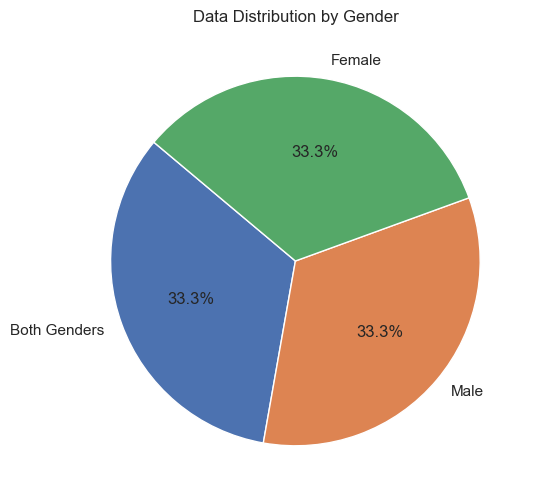

In [24]:
#Data distribution by gender
gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Data Distribution by Gender")
plt.show()

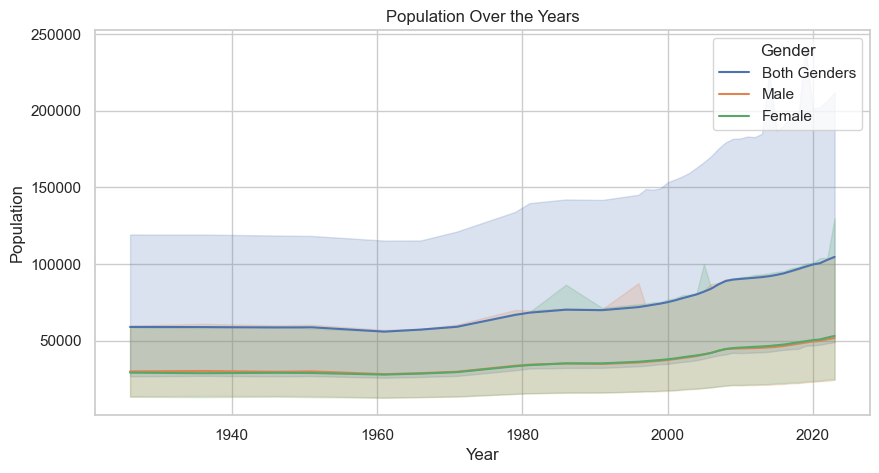

In [25]:
#Explore the relationship between year and population value
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x='Year', y='VALUE', hue='Gender')
plt.title("Population Over the Years")
plt.xlabel("Year")
plt.ylabel("Population")
plt.show()

# Preparing the data for Machine Leaning

In [26]:
df.head()

,STATISTIC Label,Year,Single Year of Age,Gender,VALUE,Decade
0,Population estimates from 1926,1926,All ages,Both Genders,2971992,1920
1,Population estimates from 1926,1926,All ages,Male,1506889,1920
2,Population estimates from 1926,1926,All ages,Female,1465103,1920
3,Population estimates from 1926,1926,Under 1 year,Both Genders,55391,1920
4,Population estimates from 1926,1926,Under 1 year,Male,28084,1920


In [27]:
#Checking for missing values
print("Missing values:\n", df.isnull().sum())

Missing values:
 STATISTIC Label       0
Year                  0
Single Year of Age    0
Gender                0
VALUE                 0
Decade                0
dtype: int64


In [28]:
#Descriptive Statistics
df.describe()

,Year,VALUE,Decade
count,11817.000000,1.181700e+04,11817.000000
mean,1996.410256,5.352461e+04,1992.051282
std,24.463165,2.867754e+05,24.723037
min,1926.000000,6.000000e+00,1920.000000
25%,1986.000000,1.242700e+04,1980.000000
50%,2004.000000,2.667500e+04,2000.000000
75%,2014.000000,3.557700e+04,2010.000000
max,2023.000000,5.281612e+06,2020.000000


In [29]:
statistics = df['VALUE'].describe()
print("Descriptive Statistics for 'VALUE':")
print(statistics)

Descriptive Statistics for 'VALUE':
count    1.181700e+04
mean     5.352461e+04
std      2.867754e+05
min      6.000000e+00
25%      1.242700e+04
50%      2.667500e+04
75%      3.557700e+04
max      5.281612e+06
Name: VALUE, dtype: float64


In [30]:
#Handling Categorical Variables
#Encoding Single Year of Age and Gender using Label Encoding
label_encoder = LabelEncoder()
df['Single Year of Age'] = label_encoder.fit_transform(df['Single Year of Age'])
df['Gender'] = label_encoder.fit_transform(df['Gender'])

In [31]:
#Feature Engineering
#Creating a feature for the difference between the Year and Decade
df['Year - Decade'] = df['Year'] - df['Decade']

In [32]:
#Splitting Data into X and y
X = df[['Year', 'Single Year of Age', 'Gender', 'Year - Decade', 'VALUE']]
y = df['VALUE']

In [33]:
#Splitting Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
#Standardize Numeric Features
scaler = StandardScaler()
X_train[['Year', 'Year - Decade', 'VALUE']] = scaler.fit_transform(X_train[['Year', 'Year - Decade', 'VALUE']])
X_test[['Year', 'Year - Decade', 'VALUE']] = scaler.transform(X_test[['Year', 'Year - Decade', 'VALUE']])

In [35]:
#Training a Machine Learning Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [36]:
y_pred = model.predict(X_test)

In [37]:
#Evaluating the Model- Regression Metrics
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 40959809.65824247


In [38]:
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
df['Decade'] = pd.to_datetime(df['Decade'], format='%Y')

#Checking for missing values
print(df.isnull().sum())

STATISTIC Label       0
Year                  0
Single Year of Age    0
Gender                0
VALUE                 0
Decade                0
Year - Decade         0
dtype: int64


In [39]:
summary_stats = df['VALUE'].describe()
print(summary_stats)

count    1.181700e+04
mean     5.352461e+04
std      2.867754e+05
min      6.000000e+00
25%      1.242700e+04
50%      2.667500e+04
75%      3.557700e+04
max      5.281612e+06
Name: VALUE, dtype: float64


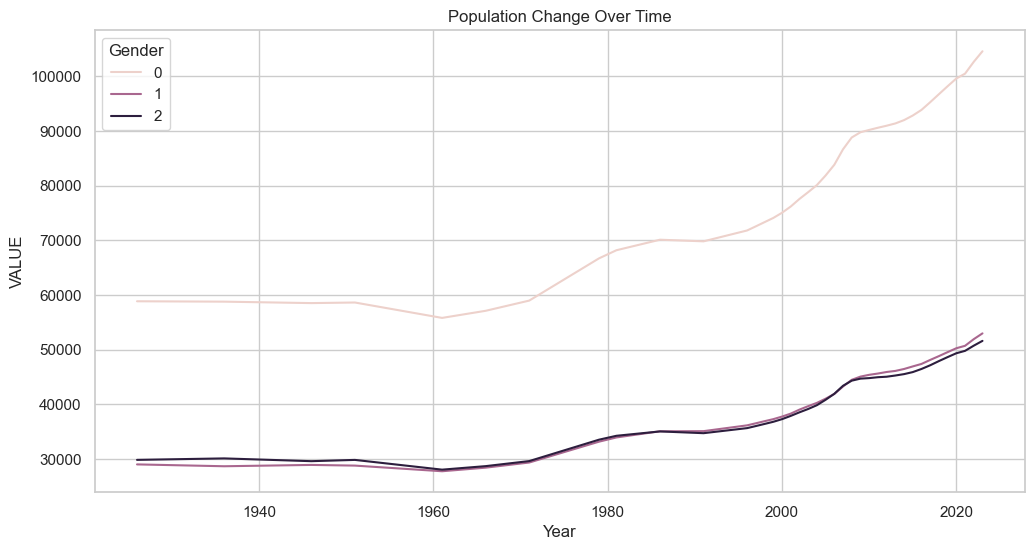

In [40]:
#Time Series Visualization
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Year', y='VALUE', hue='Gender', ci=None)
plt.title('Population Change Over Time')
plt.xlabel('Year')
plt.ylabel('VALUE')
plt.show()

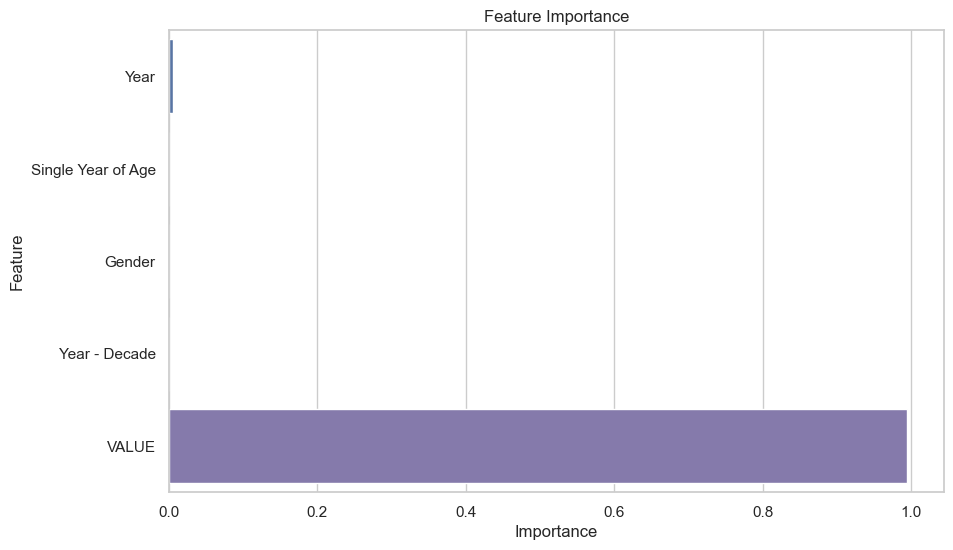

In [41]:
#Feature Importance
feature_importance = model.feature_importances_
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=X_train.columns)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Machine Learning Models 

In [42]:
#Encoding categorical variables
label_encoder = LabelEncoder()
df['Single Year of Age'] = label_encoder.fit_transform(df['Single Year of Age'])
df['Gender'] = label_encoder.fit_transform(df['Gender'])

#Creating features
X = df[['Single Year of Age', 'Gender', 'Decade']]

#Encoding Decade using one-hot encoding
X = pd.get_dummies(X, columns=['Decade'], prefix=['Decade'])

#Target variable
y = df['VALUE']

#Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Creating a Random Forest Regressor model
model = RandomForestRegressor()

#Defining hyperparameter grid for tuning
param_dist = {
    'n_estimators': [100, 150],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

#Performing hyperparameter tuning using RandomSearchcv
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
random_search.fit(X_train, y_train)

#Best hyperparameters
best_params = random_search.best_params_

#Fitting the model with the best hyperparameters
best_model = RandomForestRegressor(**best_params)
best_model.fit(X_train, y_train)

#Evaluating the model
train_score = best_model.score(X_train, y_train)
test_score = best_model.score(X_test, y_test)

print("Best Hyperparameters:", best_params)
print("Training Score:", train_score)
print("Test Score:", test_score)

Best Hyperparameters: {'n_estimators': 150, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 20}
Training Score: 0.9980380977823144
Test Score: 0.9952158223559217


In [43]:
#Encoding categorical variables
label_encoder = LabelEncoder()
df['Single Year of Age'] = label_encoder.fit_transform(df['Single Year of Age'])
df['Gender'] = label_encoder.fit_transform(df['Gender'])

#Creating features
X = df[['Single Year of Age', 'Gender', 'Decade']]

#Encoding Decade using one-hot encoding
X = pd.get_dummies(X, columns=['Decade'], prefix=['Decade'])

#Target variable
y = df['VALUE']

#Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Creating a Gradient Boosting Regressor model
model = GradientBoostingRegressor()

#Defining hyperparameter grid for tuning
param_grid = {
    'n_estimators': [100, 150],
    'learning_rate': [0.1, 0.01],
    'max_depth': [3, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

#Performing hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

#Best hyperparameters
best_params = grid_search.best_params_

#Fitting the model with the best hyperparameters
best_model = GradientBoostingRegressor(**best_params)
best_model.fit(X_train, y_train)

#Evaluating the model
train_score = best_model.score(X_train, y_train)
test_score = best_model.score(X_test, y_test)

print("Best Hyperparameters:", best_params)
print("Training Score:", train_score)
print("Test Score:", test_score)

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 150}
Training Score: 0.9981756323829368
Test Score: 0.9941194967072778


               Model                               Best Hyperparameters  \
0      Random Forest  {'learning_rate': 0.1, 'max_depth': 5, 'min_sa...   
1  Gradient Boosting  {'learning_rate': 0.1, 'max_depth': 5, 'min_sa...   

   Training Score  Test Score  
0        0.998176    0.994119  
1        0.998176    0.994119  


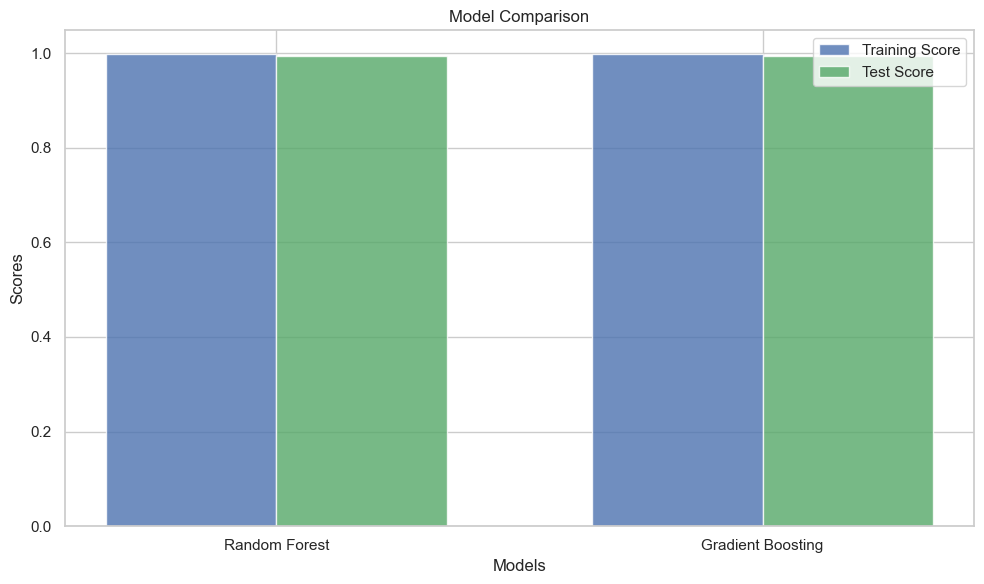

In [44]:
#Results from the Random Forest Regressor
random_forest_results = {
    "Model": "Random Forest",
    "Best Hyperparameters": best_params,
    "Training Score": train_score,
    "Test Score": test_score
}

#Results from the Gradient Boosting Regressor
gradient_boosting_results = {
    "Model": "Gradient Boosting",
    "Best Hyperparameters": best_params,
    "Training Score": train_score,
    "Test Score": test_score
}

random_forest_df = pd.DataFrame([random_forest_results])
gradient_boosting_df = pd.DataFrame([gradient_boosting_results])

#Concatenating the DataFrames for comparison
comparison_df = pd.concat([random_forest_df, gradient_boosting_df], ignore_index=True)

#Displaying the comparison table
print(comparison_df)

#Plot the comparison graph
fig, ax = plt.subplots(figsize=(10, 6))
models = comparison_df['Model']
train_scores = comparison_df['Training Score']
test_scores = comparison_df['Test Score']

bar_width = 0.35
index = range(len(models))
opacity = 0.8

plt.bar(index, train_scores, bar_width, alpha=opacity, color='b', label='Training Score')
plt.bar([i + bar_width for i in index], test_scores, bar_width, alpha=opacity, color='g', label='Test Score')

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Comparison')
plt.xticks([i + bar_width/2 for i in index], models)
plt.legend()

plt.tight_layout()
plt.show()